In [1]:
from __future__ import absolute_import, division

import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
import matplotlib as mpl
from matplotlib.offsetbox import AnchoredText
import matplotlib.patches as patches
import os
import shutil


%matplotlib inline

In [2]:
def visualize_search(frame_images, jumps, acts, video_name, frames_idxs, 
                     figsize=(16,10), fontsize=24, fontsize_bbox=24, height_ratios=None, frame_link_point = [0.5,0.05],
                     x_max=40, y_max=100, y_min=0, jump_end=0, 
                     xlabel='Search Step', ylabel='Video Time', task_text='', task_box=[0.63,0.3],
                     target_color=[251/255.0, 154/255.0, 153/255.0],
                     jump_color=[31/255.0, 120/255.0, 180/255.0],
                     end_color='r', solid_end=True,
                     end_border_thikness=5,
                     delta=0.5,
                     lw=5,
                     circle_size=300
                    ):

    # Global config.
    params = {
       'font.family': 'serif','font.serif': 'Times',
       'text.usetex': True,
       'xtick.major.size': 8,
       'ytick.major.size': 8,
       'xtick.major.width': 3,
       'ytick.major.width': 3,
       }
    mpl.rcParams.update(params)
    
    
    gs = gridspec.GridSpec(2, len(frames_idxs), height_ratios=height_ratios)
    gs.update(wspace=0.025) # set the spacing between axes. 

    fig = plt.figure(figsize=figsize)
    transFigure = fig.transFigure.inverted()
    
    # draw frames
    frames_axes = [None]*(len(frames_idxs))
    for i,j in enumerate(frames_idxs):
        frames_axes[i] = plt.subplot(gs[:1,i])
        plt.axis('off')
        plt.imshow(frame_images[i])
        plt.title('t=%.1f sec' % (jumps[j]),fontsize=fontsize/1.1)

    #add borders to last frame
    autoAxis = frames_axes[-1].axis()
    rec = patches.Rectangle((autoAxis[0]-0.7,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,
                    (autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=end_border_thikness,color=end_color)
    rec = frames_axes[-1].add_patch(rec)
    rec.set_clip_on(False)

    
#     # get limits
# #     y_lim = [np.minimum(y_min, acts[ 2 * np.abs(jump_end - acts[::2]).argmin()])-delta,
# #              np.maximum(y_max, acts[ 2 * np.abs(jump_end - acts[::2]).argmin() + 1])+delta]
#     y_lim = [np.minimum(y_min, acts[ 2 * np.abs(jump_end - acts[::2]).argmin()])-delta,
#              y_max+delta]

#     # draw target areas
    ax = plt.subplot(gs[1:,:])
#     for i in range(len(acts)//2):
#         plt.fill_between(np.arange(x_max+2)-delta,  acts[2*i]*np.ones(x_max+2) , 
#                          acts[2*i+1]*np.ones(x_max+2), 
#                          color=target_color, alpha=1.0)
# #     plt.title(video_name, fontsize=fontsize)

    
#     # draw jumps and arrows connecting them    
#     plt.scatter(range(len(jumps)-1), jumps[:-1], color=jump_color, s=circle_size)
#     ax.set_xlim([-delta,x_max+delta])
# #     ax.set_ylim([np.maximum(0, y_lim[0] * 0.9), y_lim[1] * 1.1])
#     ax.set_ylim([y_lim[0] - 10, y_lim[1] * 1.1])
    
#     for i in range(len(jumps)-2):
#         ax.annotate("",
#             xy=(i+1, jumps[i+1]), xycoords='data',
#             xytext=(i, jumps[i]), textcoords='data',
#             arrowprops=dict(
#                 arrowstyle="-|>, head_width=0.4, head_length=1",
#                 lw=4,
#                 connectionstyle="arc3",
#                 color=jump_color
#                            ),
#             )

#     plt.xlabel(xlabel, fontsize=fontsize)
#     plt.ylabel(ylabel, fontsize=fontsize)

#     draw dash lines connecting frames to jumps
#     for i,j in enumerate(frames_idxs[:-1]):
#         coord1 = transFigure.transform(frames_axes[i].transAxes.transform(frame_link_point))
#         coord2 = transFigure.transform(ax.transData.transform([j,jumps[j]]))

#         line = matplotlib.lines.Line2D((coord1[0],coord2[0]),(coord1[1],coord2[1]), 
#                                        linestyle='--',  dashes=(1, 1), lw=lw,
#                                        transform=fig.transFigure,color=jump_color)
#         fig.lines.append(line)

#     coord1 = transFigure.transform(frames_axes[-1].transAxes.transform(frame_link_point))
#     coord2 = transFigure.transform(ax.transData.transform([frames_idxs[-1],jumps[frames_idxs[-1]]]))

#     if solid_end:
#         line = matplotlib.lines.Line2D((coord1[0],coord2[0]),(coord1[1],coord2[1]), 
#                                    linestyle='-', lw=lw,
#                                    transform=fig.transFigure,color=end_color)
#     else: 
#         line = matplotlib.lines.Line2D((coord1[0],coord2[0]),(coord1[1],coord2[1]), 
#                                        linestyle='--',  dashes=(1, 1), lw=lw,
#                                        transform=fig.transFigure,color=jump_color)
        
#     plt.scatter(frames_idxs[-1],jumps[frames_idxs[-1]], color=end_color, s=circle_size)
#     fig.lines.append(line)


    # remove axes ticks 
    plt.xticks(np.arange(0, 6000, 300.0))
#     ax.set_xticklabels(['']*len(jumps))
#     ax.set_yticklabels(['']*len(jumps))
#     ax.tick_params(
#         axis='y',          # changes apply to the x-axis
#         which='both',      # both major and minor ticks are affected
#         bottom='off',      # ticks along the bottom edge are off
#         top='off',         # ticks along the top edge are off
#         left='off',         # ticks along the top edge are off
#         labelbottom='off') 
    ax.text(task_box[0], task_box[1], task_text, transform=ax.transAxes,
        bbox={'facecolor':'w', 'alpha':0.5, 'pad':10, 'linestyle': '--', 'lw': 4, 'edgecolor': 'k'}, fontsize=fontsize_bbox)


In [3]:
from matplotlib import pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib.image as mpimg

import numpy as np
import matplotlib

import numpy as np
import os
import json
from tqdm import tqdm 
import skvideo.io

path_data_dirname = "/media/giancos/Football/dataset_crop224/"

labels = ["background", "card", "substitution", "goal"]

gamePath = "england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/"
print(os.path.join(path_data_dirname, gamePath))

with open(os.path.join(path_data_dirname, gamePath, "Labels.json")) as file :
    JsonFile = json.loads(file.read())

    print(len(JsonFile['annotations']))




#     fig, axs = plt.subplots(1,len(JsonFile['annotations']),num=None, 
#             figsize=(2*len(JsonFile['annotations']), 3), 
#             dpi=100, 
#             facecolor='w',
#             edgecolor='k',
#                            sharey=True)


    half = 2
    arr_img = []
    arr_time=[]
    for i, myEvent in enumerate(JsonFile['annotations']):
        if (half == 2 and int(myEvent['gameTime'][:1]) == 1):
            videogen = skvideo.io.vreader(os.path.join(path_data_dirname, gamePath, "1.mkv"),  backend='ffmpeg')
            index_frame = 0
        elif (half == 1 and int(myEvent['gameTime'][:1]) == 2):
            videogen = skvideo.io.vreader(os.path.join(path_data_dirname, gamePath, "2.mkv"),  backend='ffmpeg')
            index_frame = 0


        half = int(myEvent['gameTime'][:1])
        second = int(myEvent['gameTime'][-2:])
        minute = int(myEvent['gameTime'][-5:-3])

        t=minute*60+second     

        if (half == 1):
            predictions = np.load(os.path.join(path_data_dirname, gamePath, "Predictions_augm_50_Half_1.npy"))
            predictions = np.load(os.path.join(path_data_dirname, gamePath, "Predictions_Half_1.npy"))
        elif (half == 2):
            predictions = np.load(os.path.join(path_data_dirname, gamePath, "Predictions_augm_50_Half_2.npy"))
            predictions = np.load(os.path.join(path_data_dirname, gamePath, "Predictions_Half_2.npy"))


        frame_fileName = os.path.join(path_data_dirname, gamePath,
                                      "Frame_%1d_%02d_%02d_" % (half, minute, second) +  myEvent['label'] + ".png")
        print(frame_fileName, arr_time)
        if (os.path.exists(frame_fileName)):
#                 print("exist")                
            arr_img.append(plt.imread(frame_fileName))
            arr_time.append((half-1)*45*60+ minute*60+ second)
            

/media/giancos/Football/dataset_crop224/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/
10
/media/giancos/Football/dataset_crop224/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/Frame_1_13_10_soccer-ball.png []
/media/giancos/Football/dataset_crop224/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/Frame_1_40_08_y-card.png [790]
/media/giancos/Football/dataset_crop224/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/Frame_2_17_02_y-card.png [790, 2408]
/media/giancos/Football/dataset_crop224/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/Frame_2_17_18_substitution-in.png [790, 2408, 3722]
/media/giancos/Football/dataset_crop224/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/Frame_2_24_26_r-card.png [790, 2408, 3722, 3738]
/media/giancos/Football/dataset_crop224/england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley/Frame_2_25_06_y-card.png [790, 2408, 3722, 3738, 4166]
/media/giancos/Foo

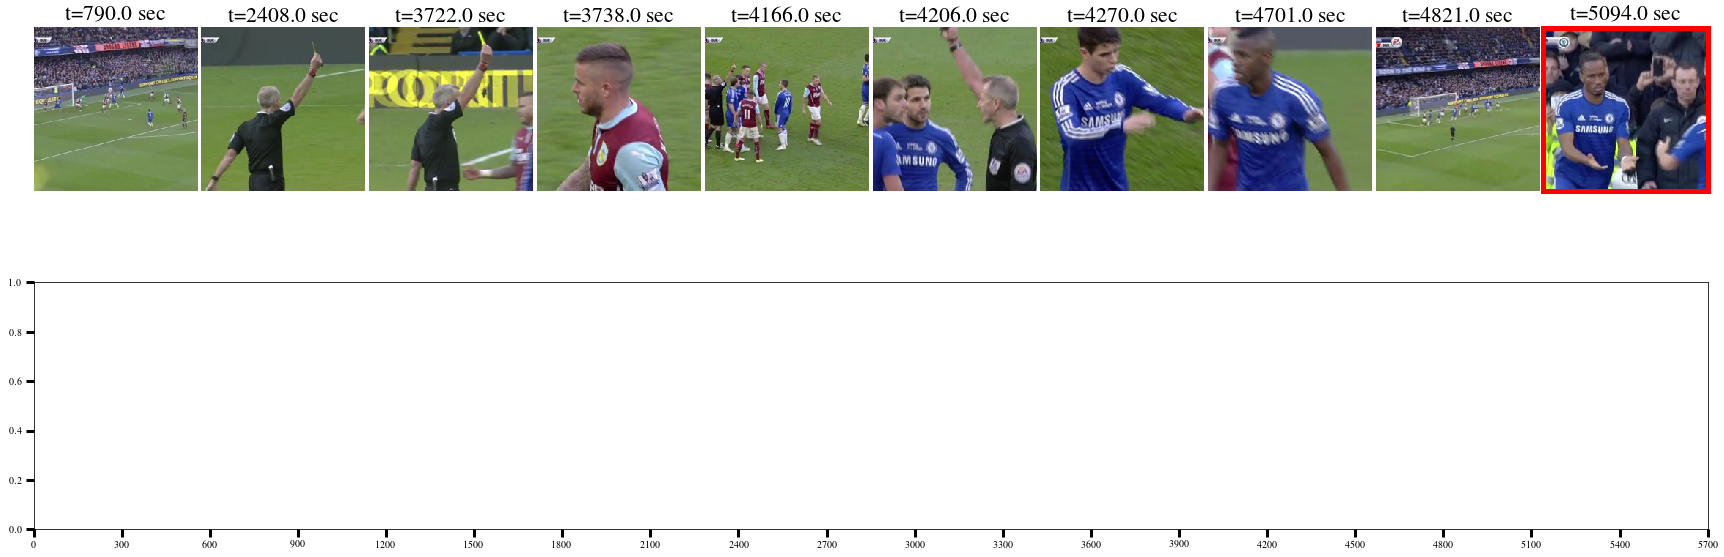

In [5]:


visualize_search(arr_img, arr_time, np.arange(len(arr_img)), "pippo", np.arange(len(arr_img)), figsize=(30,10))

